In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('abalone.csv')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

In [6]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [7]:
df['Rings'] =df['Rings'].replace(29,28)

In [8]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 28,  2, 27, 25, 24], dtype=int64)

In [9]:
df.isnull().sum().sum()

0

In [10]:
x = dict(df['Rings'].value_counts())
print(x)

{9: 689, 10: 634, 8: 568, 11: 487, 7: 391, 12: 267, 6: 259, 13: 203, 14: 126, 5: 115, 15: 103, 16: 67, 17: 58, 4: 57, 18: 42, 19: 32, 20: 26, 3: 15, 21: 14, 23: 9, 22: 6, 27: 2, 24: 2, 1: 1, 26: 1, 28: 1, 2: 1, 25: 1}


In [11]:
X = df.drop(columns='Rings', axis=1)
y = df['Rings']

In [12]:
X = X.drop(columns='Sex', axis=1)

In [13]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [16]:
y_predicted = model.predict(X_test)

In [17]:
print(metrics.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.20      0.36      0.26        11
           5       0.27      0.59      0.37        22
           6       0.28      0.39      0.32        70
           7       0.27      0.41      0.33       106
           8       0.32      0.28      0.30       148
           9       0.25      0.40      0.31       159
          10       0.32      0.10      0.16       173
          11       0.27      0.52      0.35       132
          12       0.33      0.02      0.03        60
          13       0.00      0.00      0.00        48
          14       0.00      0.00      0.00        25
          15       0.00      0.00      0.00        30
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00        18
          18       0.00      0.00      0.00        10
          19       0.00    

In [18]:
cm = metrics.confusion_matrix(y_test,y_predicted)

<AxesSubplot:>

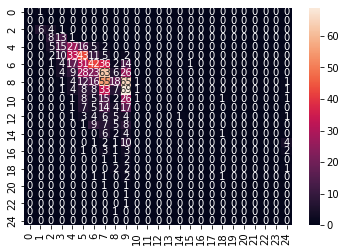

In [19]:
sns.heatmap(cm , annot=True)

In [22]:
t = model.score(X_test,y_test)*100
t

26.794258373205743

In [27]:
# import plotly.express as px
# fig = px.scatter_3d(X,x=0,y=1,z=2,color=3)
# fig.update_layout(legend_orientation='h')
# fig.show()